In [27]:
import pandas as pd
import plotnine as p9
from plotnine import *

In [28]:
q1 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q1data.csv")
q2 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q2data.csv")
q3 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q3data.csv")

In [38]:
breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
labels = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]
year_text = str(q1['year'].iloc[0])

/opt/anaconda3/lib/python3.13/site-packages/mizani/transforms.py:374: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


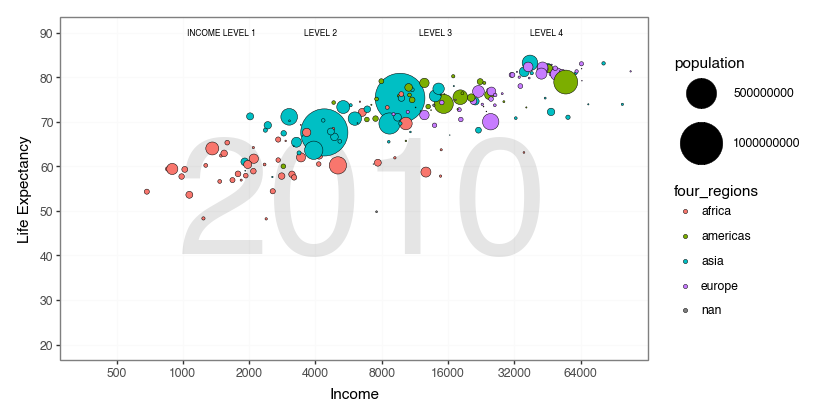

In [30]:
(
    ggplot(q1) +
    aes(x="income", y="life_exp", size="population", fill="four_regions")
    +annotate("text", x=6500, y=50, label=year_text, alpha=.1, size=120)
    +geom_point(color="black", stroke=.2)
    +scale_x_log10(
        breaks=breaks,
        labels=labels,
        limits=(0,130000)
    )
    +scale_y_continuous(breaks=range(20, 100, 10),limits=(20, 90))
    +scale_size_area(max_size=20)
    +labs(x="Income", y="Life Expectancy")
    +theme_bw()
    +theme(figure_size=(8,4))
    +theme(panel_grid_major=element_line(color="#FAFAFA"),
        panel_grid_minor=element_blank())
    +annotate("text",x= 1500, y=90, label="INCOME LEVEL 1", size=6, ha="center")
    +annotate("text",x=4200, y=90, label="LEVEL 2", size=6, ha="center")
    +annotate("text", x=14000, y=90, label= "LEVEL 3", size=6, ha="center")
    +annotate("text", x=45000, y=90, label="LEVEL 4", size=6, ha="center")



)

imports               float64
exports               float64
energy                float64
year                    int64
country                object
four_regions         category
six_regions            object
eight_regions          object
world_bank_region      object
dtype: object


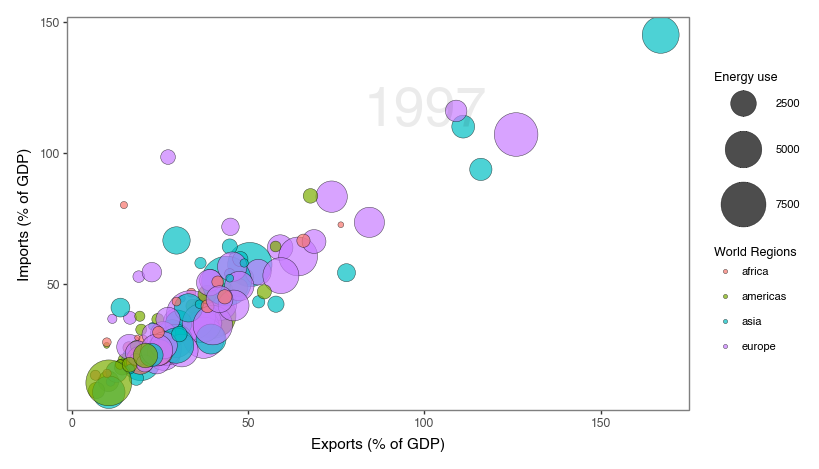

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, annotate, labs, theme_bw, theme,
    element_blank, element_text, scale_size_area, guides, guide_legend
)

df = pd.read_csv("week_1/q2data.csv")

df.columns = df.columns.str.strip()


num_cols = ["exports", "imports", "energy"]
for c in num_cols:
    
    if df[c].dtype == "O":
        df[c] = (
            df[c].astype(str)
                 .str.replace(",", "", regex=False)
                 .str.replace("%", "", regex=False)
        )
    df[c] = pd.to_numeric(df[c], errors="coerce")

if "four_regions" in df.columns:
    df["four_regions"] = df["four_regions"].astype("category")

df = df.dropna(subset=["exports", "imports", "energy", "four_regions"])

print(df.dtypes)

year_text = (
    str(int(df["year"].iloc[0])) if "year" in df.columns and pd.notna(df["year"].iloc[0])
    else "1997"
)

p2 = (
    ggplot(df, aes(
        x="exports",
        y="imports",
        size="energy",
        fill="four_regions"
    ))
    + geom_point(color="black", alpha=0.7, stroke=0.2)
    + scale_size_area(max_size=20)
    + annotate(
        "text",
        x=df["exports"].max() * 0.6,
        y=df["imports"].max() * 0.8,
        label=year_text,
        alpha=0.08,
        size=40  
    )
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        fill="World Regions",
        size="Energy use"
    )
    + guides(size=guide_legend(title="Energy use"))
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        figure_size=(8, 4.5),
        legend_title=element_text(size=9),
        legend_text=element_text(size=8)
    )
)

p2

#ai assisted

In [41]:
import pandas as pd
import plotnine as p9
from plotnine import *

In [40]:
q1 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q1data.csv")
q2 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q2data.csv")
q3 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q3data.csv")

In [42]:
breaks = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ["20", "40", "60", "80", "100", "120", "140", "160", "180", "200"]
year_text = str(q2['year'].iloc[0])

In [51]:
(
    ggplot(q2) +
    aes(x="exports", y="imports", size="energy", fill="four_regions")
    +annotate("text", x=120, y=200, label=year_text, alpha=.1, size=120)
   + geom_point(color='black', alpha=0.7, stroke=0.2)
    + scale_size_area(max_size=20)
    + annotate("text", x=q2['exports'].max()*0.6, y=q2['imports'].max()*0.8,
               label=year_text, alpha=0.08, size=120)
    
    +scale_y_continuous(breaks=range(20, 100, 10),limits=(20, 90))
    +scale_size_area(max_size=20)
    +labs(x="Income", y="Life Expectancy")
    +theme_bw()
    +theme(figure_size=(8,4))
    +theme(panel_grid_major=element_line(color="#FAFAFA"),
        panel_grid_minor=element_blank()))

/opt/anaconda3/lib/python3.13/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.



TypeError: Discrete value supplied to continuous scale

/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin_2d : Removed 35 rows containing non-finite values.


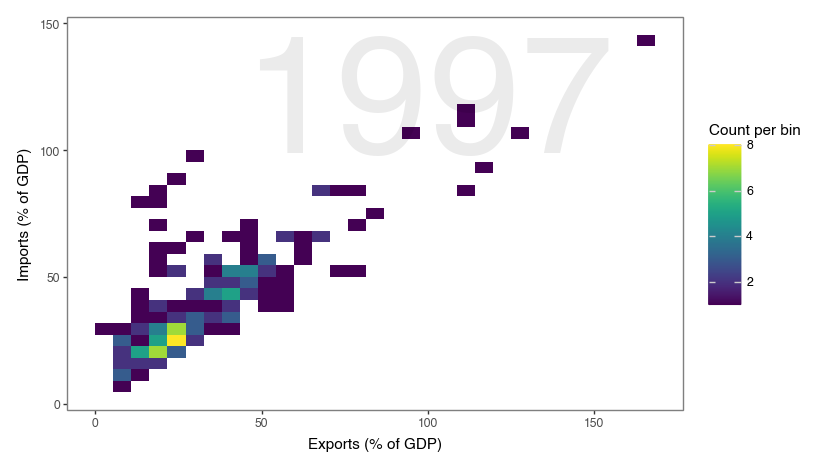

In [ ]:
from plotnine import geom_bin2d, scale_fill_continuous

p2_alt = (
    ggplot(q2, aes(x='exports', y='imports'))
    + geom_bin2d()
    + annotate("text", x=q2['exports'].max()*0.6, y=q2['imports'].max()*0.8,
               label=year_text, alpha=0.08, size=120)
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        fill="Count per bin"
    )
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        figure_size=(8, 4.5)
    )
)
p2_alt

#ai assisted 

In [63]:
import pandas as pd
from plotnine import *

q2 = pd.read_csv("week_1/q2data.csv")
year_text = str(q2["year"].iloc[0]) if "year" in q2.columns else "1997"

(
    ggplot(q2)
    + aes(x="exports", y="imports", size="energy_use", fill="four_regions")
    + annotate("text", x=220, y=55, label=year_text, alpha=.08, size=120)
    + geom_point(color="black", stroke=0.2)
    + scale_size_area(max_size=20)
    + scale_x_continuous(limits=(0, 230))
    + scale_y_continuous(limits=(0, 70))
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        size="Energy use",
        fill="World regions"
    )
    + theme_bw()
    + theme(figure_size=(9,5))
)

PlotnineError: "Could not evaluate the 'size' mapping: 'energy_use' (original error: name 'energy_use' is not defined)"

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, stat_smooth, annotate, labs, theme_bw, theme,
    element_blank, element_text, scale_size_area, scale_y_log10,
    guides, guide_legend
)

# -------- Load + normalize columns
q3 = pd.read_csv("week_1/q3data.csv")
print("Q3 columns:", q3.columns.tolist())

rename3 = {}
for col in q3.columns:
    low = col.lower()
    if "internet" in low:                 rename3[col] = "internet"
    if ("gdp" in low and "cap" in low) or ("gdp" in low and "per" in low):
                                           rename3[col] = "gdp_per_cap"
    if "income" in low:                   rename3[col] = "income"
    if "region" in low:                   rename3[col] = "four_regions"
    if low == "year":                     rename3[col] = "year"
q3 = q3.rename(columns=rename3)

# Fallbacks if needed
if "internet" not in q3:    q3["internet"] = q3[q3.columns[0]]
if "gdp_per_cap" not in q3: q3["gdp_per_cap"] = q3[q3.columns[1]]
if "income" not in q3:      q3["income"] = 1
if "four_regions" not in q3: q3["four_regions"] = "Region"

# Remove nonpositive GDP for log scale safety
q3 = q3[q3["gdp_per_cap"] > 0].copy()

year_text3 = str(q3["year"].iloc[0]) if "year" in q3 else "2001"

# -------- Bubble chart (ONE size scale only)
p3 = (
    ggplot(q3, aes(x="internet", y="gdp_per_cap", size="income", fill="four_regions"))
    + geom_point(color="black", alpha=0.7, stroke=0.2)
    + scale_size_area(max_size=20)  # only once
    + scale_y_log10()
    + annotate("text",
               x=q3["internet"].max()*0.6,
               y=q3["gdp_per_cap"].max()*0.9,
               label=year_text3, alpha=0.08, size=120)
    + labs(x="Individuals using the Internet (%)",
           y="GDP per capita (log scale)",
           fill="World Regions", size="Income")
    + guides(size=guide_legend(title="Income"))
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        figure_size=(8, 4.5),
        legend_title=element_text(size=9),
        legend_text=element_text(size=8)
    )
)
p3

p3_alt = (
    ggplot(q3, aes(x="internet", y="gdp_per_cap"))
    + stat_smooth(method="loess", se=False)
    + scale_y_log10()
    + annotate("text",
               x=q3["internet"].max()*0.6,
               y=q3["gdp_per_cap"].max()*0.9,
               label=year_text3, alpha=0.08, size=120)
    + labs(x="Individuals using the Internet (%)", y="GDP per capita (log scale)")
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        figure_size=(8, 4.5)
    )
)

Q3 columns: ['internet_users', 'gdp', 'income', 'year', 'country', 'four_regions', 'six_regions', 'eight_regions', 'world_bank_region']
<ggplot: (800 x 450)>


In [65]:
import pandas as pd
from plotnine import *

q3 = pd.read_csv("/Users/darrenbarkins/Downloads/gsb-s544/week_1/q3data.csv")
year_text = str(q3["year"].iloc[0]) if "year" in q3.columns else "2001"

(
    ggplot(q3)
    + aes(x="internet_users", y="gdp_per_capita", size="income", fill="four_regions")
    + annotate("text", x=80, y=100000, label=year_text, alpha=.08, size=120)
    + geom_point(color="black", stroke=0.2)
    + scale_y_log10(
        breaks=[10, 100, 1000, 10000, 100000],
        labels=["10", "100", "1k", "10k", "100k"],
        limits=(10, 120000)
    )
    + scale_x_continuous(limits=(0, 100))
    + scale_size_area(max_size=20)
    + labs(
        x="Individuals using the Internet (%)",
        y="GDP per capita (log10 scale)",
        size="Income",
        fill="World regions"
    )
    + theme_bw()
    + theme(figure_size=(9,5))
)

PlotnineError: "Could not evaluate the 'y' mapping: 'gdp_per_capita' (original error: name 'gdp_per_capita' is not defined)"